<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

HACK CHALLENGE

</center></font></h1>
<h2><font color='0B5345'> <center>
Reto ciencia de datos</center></font></h2>
<font  face="Courier New" size="3">
<p2> <center>Isabella Ariza - Eduardo Montoya - Juliana Moreno - Santiago Gonzalez - Luisa Zapata</center></p2>
<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

### Análisis exploratorio

In [12]:
# Importar librerías para visualización y gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# # Librerías para generar el modelo

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix

In [3]:
data = pd.read_csv("Occupancy_Estimation.csv",sep=",")
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [4]:
print(f'El números de registros es {data.shape[0]} y variables es {data.shape[1]}')


El números de registros es 10129 y variables es 19


### Limpieza de datos

In [5]:
## Verificación de filas o columnas vacias
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

### Análisis descriptivo

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


### Distribuciones de probabilidad

16


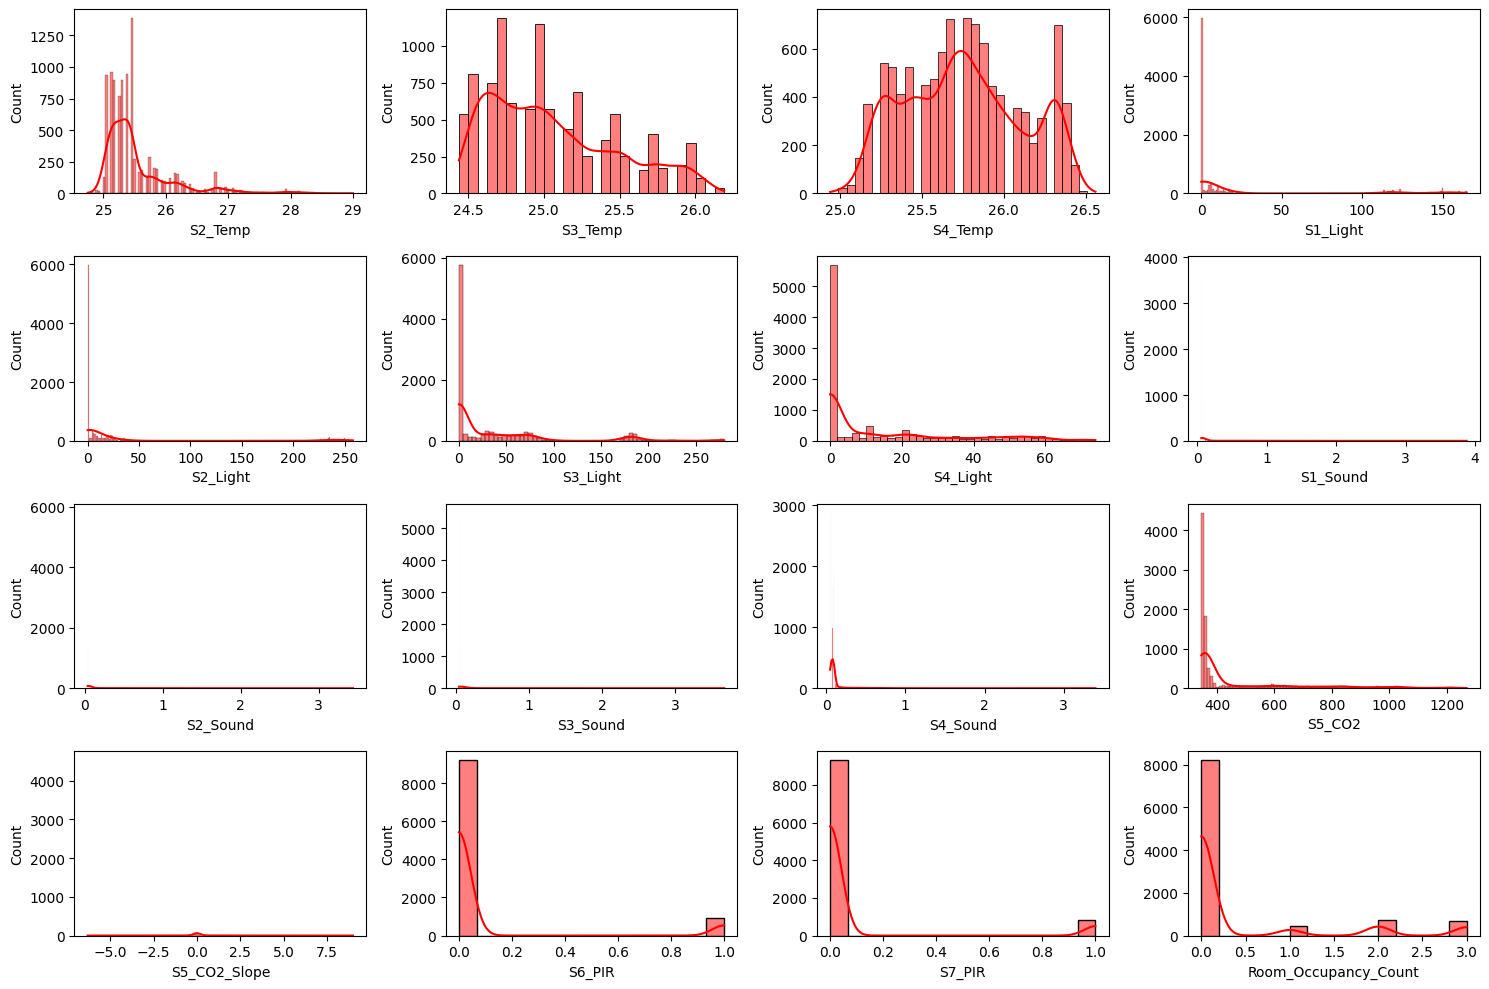

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

columnas = data.columns.tolist()
columnas = columnas[3:]
print(len(columnas))

for i, columna in enumerate(columnas):
    fila = i // 4
    col = i % 4
    sns.histplot(data[columna], kde = True,color='r',ax=axes[fila, col])
plt.tight_layout()

plt.show()


In [8]:
# Se quitan las columnas categoricas 
data_n = data.drop(["Date","Time",'S6_PIR','S7_PIR','Room_Occupancy_Count'], axis=1)
data_n

In [11]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(data_n)
df_estand = pd.DataFrame(df_estand, columns=data_n.columns)
df_estand


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,-1.121477,-0.709639,-0.858071,-1.246084,-0.381210,-0.282556,-0.021379,0.447917,-0.246855,-0.300448,-0.237223,-0.197556,-0.579432,0.004146
10125,-1.121477,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.310008,-0.262923,-0.261400,-0.197556,-0.579432,0.004146
10126,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.183703,-0.262923,-0.237223,-0.197556,-0.579432,0.004146
10127,-0.922236,-0.829032,-0.858071,-1.414426,-0.381210,-0.282556,-0.004255,0.447917,-0.278432,-0.150348,-0.140515,-0.197556,-0.579432,0.004146


In [14]:
pca = PCA(n_components=14)
p_components  = pca.fit(df_estand)
loadings = pca.components_
for i, pc_loadings in enumerate(loadings):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"{df_estand.columns.tolist()[j]} {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
S1_Temp 1: 0.3131
S2_Temp 2: 0.3012
S3_Temp 3: 0.3010
S4_Temp 4: 0.2808
S1_Light 5: 0.3192
S2_Light 6: 0.2928
S3_Light 7: 0.3131
S4_Light 8: 0.1781
S1_Sound 9: 0.2424
S2_Sound 10: 0.2312
S3_Sound 11: 0.2404
S4_Sound 12: 0.2204
S5_CO2 13: 0.2887
S5_CO2_Slope 14: 0.1501
Loadings for PC2:
S1_Temp 1: -0.3216
S2_Temp 2: -0.1958
S3_Temp 3: -0.3550
S4_Temp 4: -0.3226
S1_Light 5: 0.1094
S2_Light 6: 0.1500
S3_Light 7: 0.0667
S4_Light 8: 0.1162
S1_Sound 9: 0.2554
S2_Sound 10: 0.3047
S3_Sound 11: 0.2404
S4_Sound 12: 0.3142
S5_CO2 13: -0.2956
S5_CO2_Slope 14: 0.4167
Loadings for PC3:
S1_Temp 1: 0.1126
S2_Temp 2: -0.0170
S3_Temp 3: 0.0554
S4_Temp 4: -0.0455
S1_Light 5: -0.2345
S2_Light 6: -0.2475
S3_Light 7: -0.2114
S4_Light 8: -0.5796
S1_Sound 9: 0.1827
S2_Sound 10: 0.1766
S3_Sound 11: 0.4085
S4_Sound 12: 0.4137
S5_CO2 13: 0.1544
S5_CO2_Slope 14: -0.2422
Loadings for PC4:
S1_Temp 1: -0.1172
S2_Temp 2: -0.0257
S3_Temp 3: 0.0100
S4_Temp 4: 0.1396
S1_Light 5: -0.1400
S2_Light 6: -0.

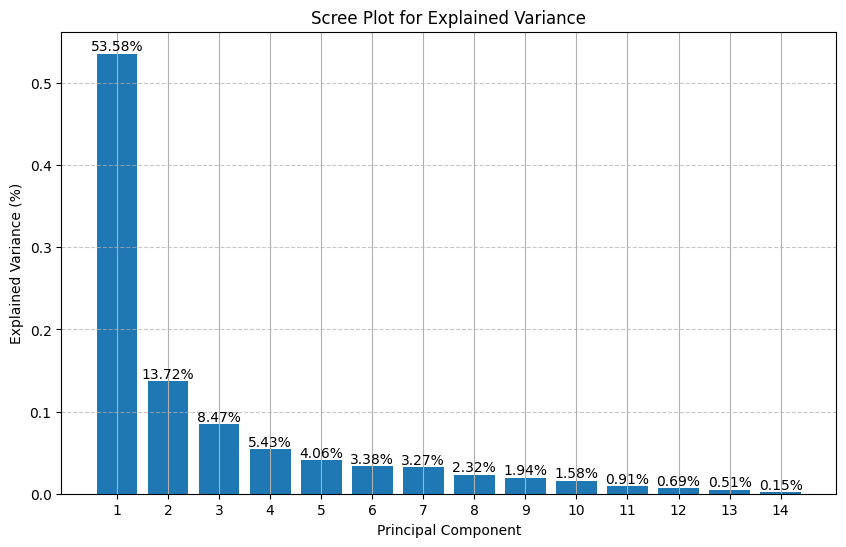

In [15]:
explained_variance = pca.explained_variance_ratio_

plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
pca2 = PCA(n_components=6)
p_components  = pca2.fit(df_estand)

In [18]:
loadings2 = pca2.components_
for i, pc_loadings in enumerate(loadings2):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"{df_estand.columns.tolist()[j]} {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
S1_Temp 1: 0.3131
S2_Temp 2: 0.3012
S3_Temp 3: 0.3010
S4_Temp 4: 0.2808
S1_Light 5: 0.3192
S2_Light 6: 0.2928
S3_Light 7: 0.3131
S4_Light 8: 0.1781
S1_Sound 9: 0.2424
S2_Sound 10: 0.2312
S3_Sound 11: 0.2404
S4_Sound 12: 0.2204
S5_CO2 13: 0.2887
S5_CO2_Slope 14: 0.1501
Loadings for PC2:
S1_Temp 1: -0.3216
S2_Temp 2: -0.1958
S3_Temp 3: -0.3550
S4_Temp 4: -0.3226
S1_Light 5: 0.1094
S2_Light 6: 0.1500
S3_Light 7: 0.0667
S4_Light 8: 0.1162
S1_Sound 9: 0.2554
S2_Sound 10: 0.3047
S3_Sound 11: 0.2404
S4_Sound 12: 0.3142
S5_CO2 13: -0.2956
S5_CO2_Slope 14: 0.4167
Loadings for PC3:
S1_Temp 1: 0.1126
S2_Temp 2: -0.0170
S3_Temp 3: 0.0554
S4_Temp 4: -0.0455
S1_Light 5: -0.2345
S2_Light 6: -0.2475
S3_Light 7: -0.2114
S4_Light 8: -0.5796
S1_Sound 9: 0.1827
S2_Sound 10: 0.1766
S3_Sound 11: 0.4085
S4_Sound 12: 0.4137
S5_CO2 13: 0.1544
S5_CO2_Slope 14: -0.2422
Loadings for PC4:
S1_Temp 1: -0.1172
S2_Temp 2: -0.0257
S3_Temp 3: 0.0100
S4_Temp 4: 0.1396
S1_Light 5: -0.1400
S2_Light 6: -0.

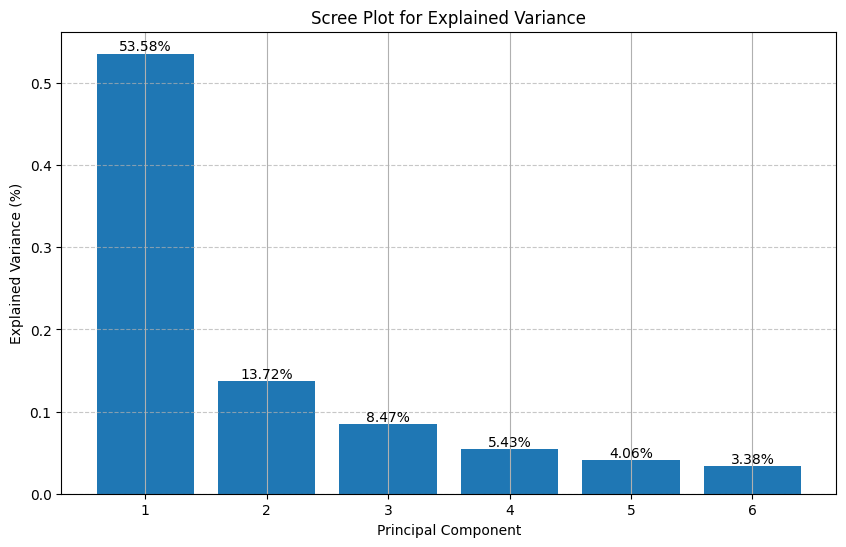

In [19]:
explained_variance2 = pca2.explained_variance_ratio_
plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance2) + 1), explained_variance2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance2) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance2):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:

for col in data.columns.tolist()[2:]:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna S1_Temp son 0
Numero de observaciones menores o iguales a cero en la columna S2_Temp son 0
Numero de observaciones menores o iguales a cero en la columna S3_Temp son 0
Numero de observaciones menores o iguales a cero en la columna S4_Temp son 0
Numero de observaciones menores o iguales a cero en la columna S1_Light son 5845
Numero de observaciones menores o iguales a cero en la columna S2_Light son 5846
Numero de observaciones menores o iguales a cero en la columna S3_Light son 5591
Numero de observaciones menores o iguales a cero en la columna S4_Light son 5599
Numero de observaciones menores o iguales a cero en la columna S1_Sound son 0
Numero de observaciones menores o iguales a cero en la columna S2_Sound son 0
Numero de observaciones menores o iguales a cero en la columna S3_Sound son 0
Numero de observaciones menores o iguales a cero en la columna S4_Sound son 0
Numero de observaciones menores o iguales a cero en la c

### Detección de datos atípicos

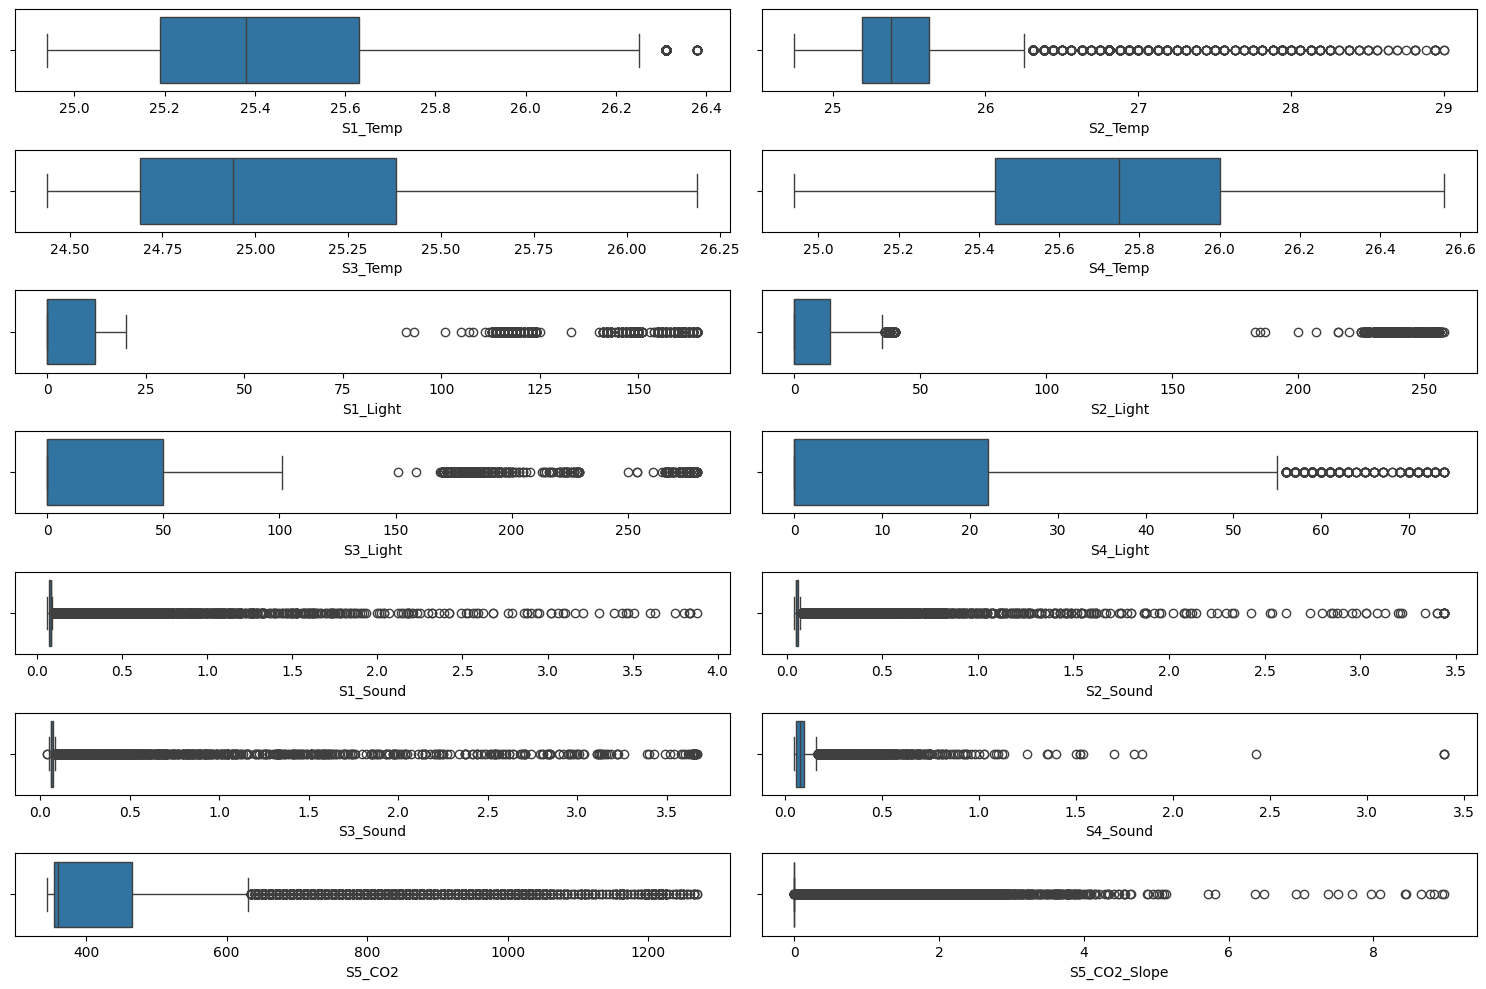

In [27]:
int_vars = data.select_dtypes(include = ['int','float'])
int_vars = data.columns.tolist()[2:-3]
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate(int_vars):
    sns.boxplot(x=var,data=data,ax=axs[i])
    #axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Matriz de correlación

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data[[data.columns.tolist()[2:]]].corr(),fmt='.2g',annot=True)
plt.show()

KeyError: "None of [Index([('S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count')], dtype='object')] are in the [columns]"

<Figure size 1500x1000 with 0 Axes>

### **Cálculo de métricas de evaluación**
_________________________

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [113]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.73
Precisión: 0.72
Recall: 0.49
F1-score: 0.59
